In [1]:
#基本套件和模組
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.sans-serif'] = ['DFKai-sb']
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [2]:
#載入資料並將日期格式轉換為日期--使用資料為Tripadvistor中對兩家航空公司的評論
df = pd.read_excel('tripadvisor.xlsx',parse_dates=['date'])
df.head()

,uid,rating,date,title,content
0,Kay C,4,2019-09-05,"還行, 回程延遲",位置空間還不錯。餐點也很可以。3-3機位。清潔度很不錯。對小朋友也還可以。出發的時間很準時。...
1,MinJer Lai,3,2019-09-05,空服員訓練仍有不足,"台北紐約航段有一個點心餐和兩個正餐, 點心餐就是堅果包和飲料\n在第一個正餐,我們被告知沒有..."
2,Rui,3,2019-09-04,舊機型沒個人娛樂、回程魚肉飯好吃,舊機型沒個人娛樂，只有抬頭電視可以看公放的電影、回程魚肉飯好吃。颱風剛過有小延誤，高的人坐起...
3,gigil169,4,2019-08-23,"準點, 對之前的猶豫已一掃而空","真的沒有讓人失望, 之前只坐過一次, 但還是會猶豫不決, 最後因為航班選擇比較多, 彈性大一..."
4,Wei-hsiang,4,2019-08-20,舒適,舒適平穩，並且提供餐點供乘客享用，座位上亦提供薄毯避免乘客受寒，座位前方有休閒娛樂系統，其中...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   uid      2557 non-null   object        
 1   rating   2557 non-null   int64         
 2   date     2557 non-null   datetime64[ns]
 3   title    2557 non-null   object        
 4   content  2557 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 100.0+ KB


無遺漏值

In [4]:
#觀察評分比例
size=df['rating'].value_counts().sort_index()
pct =df['rating'].value_counts(normalize=True).round(3).sort_index()
pd.DataFrame(zip(size,pct),columns=['次數','百分比'],index=range(1,6))

,次數,百分比
1,52,0.020
2,72,0.028
3,287,0.112
4,1019,0.399
5,1127,0.441


可以看出滿意的占多數(4~5分)，大部分使用者給予正面的評價。

In [5]:
#觀察各年的使用者評論的平均分數
df.groupby(df['date'].dt.year)['rating'].agg(['size','mean'])

,size,mean
date,,
2016,810,4.251852
2017,795,4.270440
2018,685,4.144526
2019,267,4.082397


平均分數在4分以下，2019年略低。

In [3]:
#載入中文斷字套件
!pip install jieba

  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314476 sha256=3f6d9ca08bbd3c2f6afe6d7b34f1dfeaea939debe1a98b916527e357c6bf2cf8
  Stored in directory: c:\users\docto\appdata\local\pip\cache\wheels\7d\74\cf\08c94db4b784e2c1ef675a600b7b5b281fd25240dcb954ee7e
Successfully built jieba


In [3]:
#測試詞袋處理
import jieba
from sklearn.feature_extraction.text import CountVectorizer
s = ' '.join(jieba.cut('下雨天留客天留我不留'))
cv = CountVectorizer()
bow = cv.fit_transform([s])
pd.DataFrame(bow.toarray(),columns=cv.get_feature_names_out())

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\docto\AppData\Local\Temp\jieba.cache
Loading model cost 0.700 seconds.
Prefix dict has been built successfully.


,下雨天,不留,天留,留客
0,1,1,1,1


In [16]:
#允許詞袋裡存在單一字元的字
cv = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
bow = cv.fit_transform([s])
pd.DataFrame(bow.toarray(),columns=cv.get_feature_names())

,下雨天,不留,天留,我,留客
0,1,1,1,1,1


In [18]:
#查看第一句
df.iloc[0]['content']

'位置空間還不錯。餐點也很可以。3-3機位。清潔度很不錯。對小朋友也還可以。出發的時間很準時。但是回程就碰上延遲, 約40分鐘。沒有個人娛樂設施。'

In [20]:
#查看斷字
s = ' '.join(jieba.cut(df.iloc[0]['content']))
s

'位置 空間 還不錯 。 餐點 也 很 可以 。 3 - 3 機位 。 清潔度 很 不錯 。 對 小朋友 也還 可以 。 出發 的 時間 很 準時 。 但是 回程 就 碰上 延遲 ,   約 40 分鐘 。 沒有 個 人 娛樂 設施 。'

In [4]:
#讀入停用字
with open('stop.text','r',encoding='utf-8') as f:
    stops= f.read()
stops=stops.split('\n')
#詞袋使用
cv = CountVectorizer(token_pattern='(?u)\\b\\w+\\b',stop_words=stops)
bow = cv.fit_transform([s])
print(cv.get_feature_names_out())

['下雨天' '不留' '天留' '留客']


In [23]:
#使用ngram
cv = CountVectorizer(token_pattern='(?u)\\b\\w+\\b',stop_words=stops,ngram_range=(1,2))
bow = cv.fit_transform([s])
print(cv.get_feature_names())

['40', '40 分鐘', '不錯', '不錯 小朋友', '也還', '也還 出發', '位置', '位置 空間', '出發', '出發 時間', '分鐘', '分鐘 沒有', '回程', '回程 碰上', '娛樂', '娛樂 設施', '小朋友', '小朋友 也還', '延遲', '延遲 約', '時間', '時間 準時', '機位', '機位 清潔度', '沒有', '沒有 娛樂', '清潔度', '清潔度 不錯', '準時', '準時 回程', '碰上', '碰上 延遲', '空間', '空間 還不錯', '約', '約 40', '設施', '還不錯', '還不錯 餐點', '餐點', '餐點 機位']


In [5]:
#資料切割為滿意和不滿意
df['rating'] = (df['rating'] > 3).map({True:1,False:0})
df['rating'].value_counts()

1    2146
0     411
Name: rating, dtype: int64

滿意為2146筆，不滿意為411筆。

In [6]:
#定義與切割
x = df['content']
y = df['rating']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_train.head()

2494    很準時。 服務很好。 在飛機上的娛樂很不錯。 食物質量也下降了,不過也還可以吃。 臺灣桃園國...
1552    乘坐長榮航空由澳門飛台北，航程很短。空姐服務質素基本不錯，可惜機上的飛機餐實在太差！又不是廉...
90      當時正是發生機師罷工的時候，但班機沒有被取消或延誤，仍然得以準時的抵達。\n空服人員都很親切...
666     航班準時,空服員親切有禮,能給予我適合的服務,對於我的問題可以很清楚的答覆並解決\n,是我旅...
1493    很欠沒搭此公司航班，上餐速度快，空中服務員有禮貌，行李出來時間也比較快。下次有優惠會選用。\...
Name: content, dtype: object

In [7]:
#撰寫斷字程式
def preprocessor(s):
    return ' '.join(jieba.cut(s))
print('斷字函數測試:',preprocessor('下雨天留客天留我不留'))
#建立詞袋
cv = CountVectorizer(preprocessor=preprocessor,token_pattern='(?u)\\b\\w+\\b',stop_words=stops)
bow = cv.fit_transform(['下雨天留客天留我不留'])
pd.DataFrame(bow.toarray(),columns=cv.get_feature_names_out())

斷字函數測試: 下雨天 留客 天留 我 不留


,下雨天,不留,天留,留客
0,1,1,1,1


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV

In [33]:
#使用模型和組合器來進行預測
model_pl=Pipeline([('preprocess',CountVectorizer(preprocessor=preprocessor,token_pattern='(?u)\\b\\w+\\b',stop_words=stops)),('model',LogisticRegression())])
param_grid = {'model':[LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(max_depth=10),MultinomialNB(),XGBClassifier(),BaggingClassifier(),AdaBoostClassifier(),RandomForestClassifier()]}
gs=GridSearchCV(model_pl,param_grid=param_grid,cv=5,return_train_score=True)
gs.fit(x_train,y_train)
score = gs.best_estimator_.score(x_test,y_test)
print('最佳預測模型和參數',gs.best_params_['model'])
print('訓練集的最佳結果',gs.best_score_.round(3))
print('測試集訓練結果',score.round(3))
y_pred = gs.best_estimator_.predict(x_test)
print('混亂矩陣')
print(pd.DataFrame(confusion_matrix(y_test,y_pred),index=['實際1','實際2'],columns=['預測1','預測2']))
print('綜合報告')
print(classification_report(y_test,y_pred))

最佳預測模型和參數 LogisticRegression()
訓練集的最佳結果 0.85
測試集訓練結果 0.871
混亂矩陣
     預測1  預測2
實際1   42   76
實際2   23  627
綜合報告
              precision    recall  f1-score   support

           0       0.65      0.36      0.46       118
           1       0.89      0.96      0.93       650

    accuracy                           0.87       768
   macro avg       0.77      0.66      0.69       768
weighted avg       0.85      0.87      0.85       768



最佳預測模型為羅吉斯迴歸，準確率為0.871，不過如果要了解不滿意的評論，其樣本不滿意的召回率僅0.36，所以要找出不滿意評論，要進行資料不均衡的處理。

In [34]:
#向下取樣
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
model_pl=make_pipeline(CountVectorizer(preprocessor=preprocessor,token_pattern='(?u)\\b\\w+\\b',stop_words=stops),RandomUnderSampler(),LogisticRegression())
model_pl.fit(x_train,y_train)
y_pred = model_pl.predict(x_test)
score = model_pl.score(x_test,y_test)
print('測試集訓練結果',score.round(3))
y_pred = model_pl.predict(x_test)
print('混亂矩陣')
print(pd.DataFrame(confusion_matrix(y_test,y_pred),index=['實際1','實際2'],columns=['預測1','預測2']))
print('綜合報告')
print(classification_report(y_test,y_pred))

測試集訓練結果 0.732
混亂矩陣
     預測1  預測2
實際1   79   39
實際2  167  483
綜合報告
              precision    recall  f1-score   support

           0       0.32      0.67      0.43       118
           1       0.93      0.74      0.82       650

    accuracy                           0.73       768
   macro avg       0.62      0.71      0.63       768
weighted avg       0.83      0.73      0.76       768



正確率下降至0.732，但召回率上升至0.67。

In [35]:
#向上取樣
from imblearn.over_sampling import SMOTE
model_pl=make_pipeline(CountVectorizer(preprocessor=preprocessor,token_pattern='(?u)\\b\\w+\\b',stop_words=stops),SMOTE(),LogisticRegression())
model_pl.fit(x_train,y_train)
y_pred = model_pl.predict(x_test)
score = model_pl.score(x_test,y_test)
print('測試集訓練結果',score.round(3))
y_pred = model_pl.predict(x_test)
print('混亂矩陣')
print(pd.DataFrame(confusion_matrix(y_test,y_pred),index=['實際1','實際2'],columns=['預測1','預測2']))
print('綜合報告')
print(classification_report(y_test,y_pred))

測試集訓練結果 0.793
混亂矩陣
     預測1  預測2
實際1   48   70
實際2   89  561
綜合報告
              precision    recall  f1-score   support

           0       0.35      0.41      0.38       118
           1       0.89      0.86      0.88       650

    accuracy                           0.79       768
   macro avg       0.62      0.63      0.63       768
weighted avg       0.81      0.79      0.80       768



正確率上升至0.793，但召回率下降至0.41。

In [9]:
#將標題也納入考量
#水平整合器
from sklearn.compose import ColumnTransformer
x = df[['title','content']]
data_pl = ColumnTransformer([('title',CountVectorizer(preprocessor=preprocessor,token_pattern='(?u)\\b\\w+\\b',stop_words=stops),'title'),('content',CountVectorizer(preprocessor=preprocessor,token_pattern='(?u)\\b\\w+\\b',stop_words=stops),'content')])
data_pl.fit_transform(x).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
model_pl=make_pipeline(data_pl,LogisticRegression())
model_pl.fit(x_train,y_train)
y_pred = model_pl.predict(x_test)
score = model_pl.score(x_test,y_test)
print('測試集訓練結果',score.round(3))
y_pred = model_pl.predict(x_test)
print('混亂矩陣')
print(pd.DataFrame(confusion_matrix(y_test,y_pred),index=['實際1','實際2'],columns=['預測1','預測2']))
print('綜合報告')
print(classification_report(y_test,y_pred))

測試集訓練結果 0.859
混亂矩陣
     預測1  預測2
實際1   41   87
實際2   21  619
綜合報告
              precision    recall  f1-score   support

           0       0.66      0.32      0.43       128
           1       0.88      0.97      0.92       640

    accuracy                           0.86       768
   macro avg       0.77      0.64      0.68       768
weighted avg       0.84      0.86      0.84       768



再把標題也納入考量後，準確率為0.859，不過其樣本不滿意的召回率僅0.32，所以要找出不滿意評論，還是要進行資料不均衡的處理。

In [41]:
#向下取樣
model_pl=make_pipeline(data_pl,RandomUnderSampler(),LogisticRegression())
model_pl.fit(x_train,y_train)
y_pred = model_pl.predict(x_test)
score = model_pl.score(x_test,y_test)
print('測試集訓練結果',score.round(3))
y_pred = model_pl.predict(x_test)
print('混亂矩陣')
print(pd.DataFrame(confusion_matrix(y_test,y_pred),index=['實際1','實際2'],columns=['預測1','預測2']))
print('綜合報告')
print(classification_report(y_test,y_pred))

測試集訓練結果 0.759
混亂矩陣
     預測1  預測2
實際1   94   34
實際2  151  489
綜合報告
              precision    recall  f1-score   support

           0       0.38      0.73      0.50       128
           1       0.93      0.76      0.84       640

    accuracy                           0.76       768
   macro avg       0.66      0.75      0.67       768
weighted avg       0.84      0.76      0.78       768



正確率下降至0.759，但召回率上升至0.73。

In [42]:
#向上取樣
model_pl=make_pipeline(data_pl,SMOTE(),LogisticRegression())
model_pl.fit(x_train,y_train)
y_pred = model_pl.predict(x_test)
score = model_pl.score(x_test,y_test)
print('測試集訓練結果',score.round(3))
y_pred = model_pl.predict(x_test)
print('混亂矩陣')
print(pd.DataFrame(confusion_matrix(y_test,y_pred),index=['實際1','實際2'],columns=['預測1','預測2']))
print('綜合報告')
print(classification_report(y_test,y_pred))

測試集訓練結果 0.812
混亂矩陣
     預測1  預測2
實際1   54   74
實際2   70  570
綜合報告
              precision    recall  f1-score   support

           0       0.44      0.42      0.43       128
           1       0.89      0.89      0.89       640

    accuracy                           0.81       768
   macro avg       0.66      0.66      0.66       768
weighted avg       0.81      0.81      0.81       768



正確率上升至0.812，但召回率下降至0.42。

In [10]:
#主題探索(潛在狄式分配)
n_topics = 5
n_words = 10
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=n_topics)
cv = CountVectorizer(preprocessor=preprocessor,token_pattern='(?u)\\b\\w+\\b',stop_words=stops,max_df=0.5)
x_array =cv.fit_transform(df['content'])
x_topics=lda.fit_transform(x_array)
idx=cv.get_feature_names_out()
#查看第一篇主題
pd.DataFrame(lda.components_[0],index=idx,columns=['topic']).\
sort_values(by='topic',ascending=False)[:n_words]

,topic
飛機,132.678643
時間,103.654931
沒,100.864394
空姐,72.936927
座位,71.847513
華航,71.697735
說,69.010840
榮,66.416349
餐點,61.163043
長,60.238126


In [11]:
#展示5個主題
words={}
for topic in range(n_topics):
    word = pd.DataFrame(lda.components_[topic],index=idx).\
            sort_values(by=0,ascending=False)[:n_words].index.tolist()
    words[f'主題{topic+1}'] = word
pd.DataFrame(words)

,主題1,主題2,主題3,主題4,主題5
0,飛機,長,座位,服務,一個
1,時間,選擇,餐點,航空,航空公司
2,沒,餐點,飛機,長,飛機
3,空姐,機上,時間,榮,食物
4,座位,航班,沒,餐點,航班
5,華航,榮,機上,非常,服務
6,說,經濟艙,飛行,搭乘,座位
7,榮,沒有,說,親切,非常
8,餐點,座位,服務,飛機,很棒
9,長,航空,機場,機上,爲


In [12]:
#文字雲
#使用詞袋
cv = CountVectorizer(preprocessor=preprocessor,token_pattern='(?u)\\b\\w+\\b',stop_words=stops,max_df=0.5)
bow =cv.fit_transform(df['content'])
df_bow = pd.DataFrame(bow.toarray(),columns=cv.get_feature_names_out())

<AxesSubplot:>

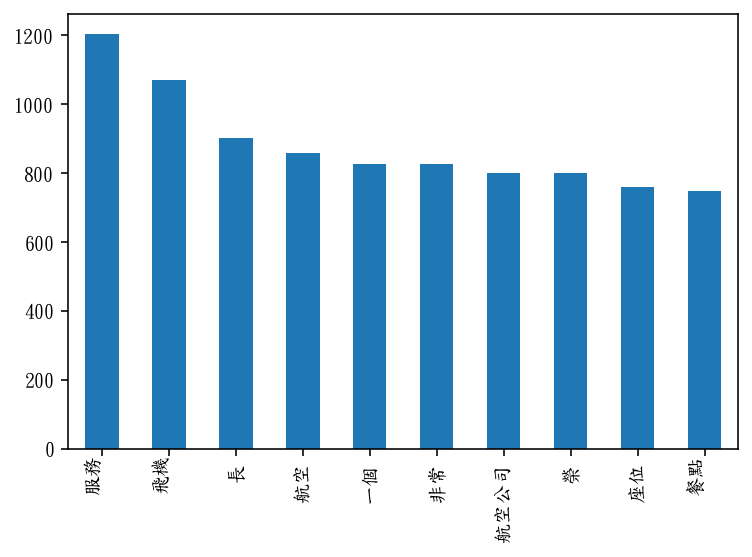

In [13]:
#查看最常見的十大關鍵字
df_bow.sum().sort_values(ascending=False)[:10].plot(kind='bar')

In [40]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [47]:
!pip install Pillow

(-0.5, 799.5, 493.5, -0.5)

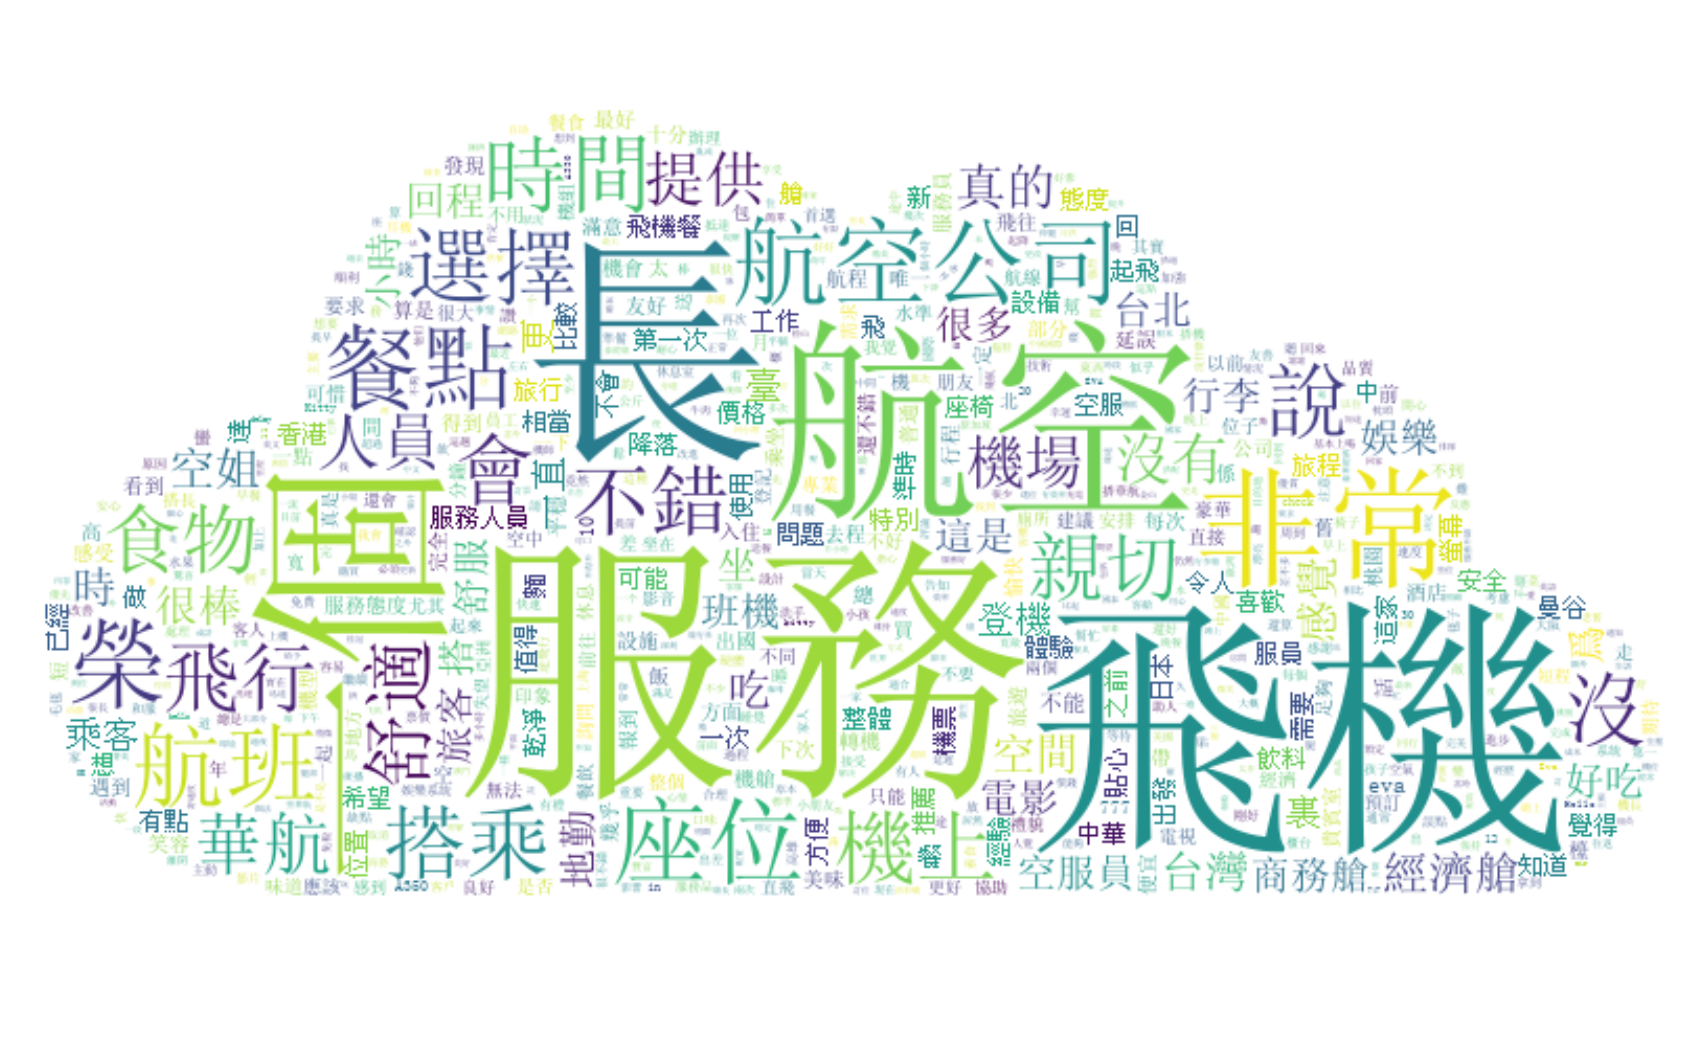

In [17]:
#繪製文字雲
import PIL
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from PIL import Image

alice_mask = np.array(Image.open('cloud_mask7.png'))
wc = WordCloud(background_color='white',max_words=2000,mask=alice_mask,font_path='simsun.ttf')
wc.generate_from_frequencies(df_bow.sum())
wc.to_file('cioud.png')

plt.figure(figsize=(15,15))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')